In [39]:
!pip install plotly
!pip install scikit-learn
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install graphviz

In [40]:
%matplotlib inline
import sklearn as sk
import numpy as np
import plotly.express as px
import pandas as pd
import seaborn as sns

In [41]:
# Loading Datasets
data = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', usecols=['DR_NO','AREA NAME' ,'Date Rptd', 'DATE OCC', 'TIME OCC', 'LOCATION', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Weapon Desc', 'Premis Desc', 'LAT', 'LON'], header=0)
data = data[data['DATE OCC'].str.contains('2024') | data['DATE OCC'].str.contains('2025')]
data = data[data['Vict Age'] != 0]
data.dropna(inplace=True)

encoded = pd.DataFrame()

data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
877324,240604934,01/21/2024 12:00:00 AM,01/21/2024 12:00:00 AM,1510,Hollywood,BATTERY - SIMPLE ASSAULT,22,F,MISSIONS/SHELTERS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N WESTERN AV,34.0944,-118.3125
877326,242107187,03/22/2024 12:00:00 AM,03/22/2024 12:00:00 AM,1815,Topanga,BATTERY - SIMPLE ASSAULT,58,M,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22000 GILMORE ST,34.1876,-118.6070
877328,240607797,03/25/2024 12:00:00 AM,03/25/2024 12:00:00 AM,1422,Hollywood,OTHER ASSAULT,50,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,1900 N VAN NESS AV,34.1053,-118.3159
877333,240904953,01/28/2024 12:00:00 AM,01/26/2024 12:00:00 AM,1808,Van Nuys,BATTERY - SIMPLE ASSAULT,26,F,RESTAURANT/FAST FOOD,UNKNOWN WEAPON/OTHER WEAPON,14800 VICTORY BL,34.1867,-118.4553
877339,242005136,01/27/2024 12:00:00 AM,01/27/2024 12:00:00 AM,1742,Olympic,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",MACE/PEPPER SPRAY,1900 W WASHINGTON BL,34.0437,-118.3029


# Date to Number

In [42]:
# Time Conversion

# Combine DATE OCC and TIME OCC into a single datetime column
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
#data['DATE OCC'] = pd.to_datetime(data['DATE OCC'] + ' ' + data['TIME OCC'], format='%Y-%m-%d %M:%S')
# Convert the datetime column to Unix timestamps
encoded['UNIX_TIMESTAMP'] = data['DATE OCC'].apply(lambda x: x.timestamp())
encoded['TIME OCC'] = data['TIME OCC'].copy()
encoded['Vict Age'] = data['Vict Age'].copy()
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Premis Desc,Weapon Desc,LOCATION,LAT,LON
877324,240604934,01/21/2024 12:00:00 AM,2024-01-21,1510,Hollywood,BATTERY - SIMPLE ASSAULT,22,F,MISSIONS/SHELTERS,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1300 N WESTERN AV,34.0944,-118.3125
877326,242107187,03/22/2024 12:00:00 AM,2024-03-22,1815,Topanga,BATTERY - SIMPLE ASSAULT,58,M,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",22000 GILMORE ST,34.1876,-118.6070
877328,240607797,03/25/2024 12:00:00 AM,2024-03-25,1422,Hollywood,OTHER ASSAULT,50,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",UNKNOWN WEAPON/OTHER WEAPON,1900 N VAN NESS AV,34.1053,-118.3159
877333,240904953,01/28/2024 12:00:00 AM,2024-01-26,1808,Van Nuys,BATTERY - SIMPLE ASSAULT,26,F,RESTAURANT/FAST FOOD,UNKNOWN WEAPON/OTHER WEAPON,14800 VICTORY BL,34.1867,-118.4553
877339,242005136,01/27/2024 12:00:00 AM,2024-01-27,1742,Olympic,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53,M,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",MACE/PEPPER SPRAY,1900 W WASHINGTON BL,34.0437,-118.3029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005106,251904146,02/20/2025 12:00:00 AM,2025-02-20,1530,Mission,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",16,F,HIGH SCHOOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",13000 BORDEN AV,34.3061,-118.4414
1005117,251704149,02/28/2025 12:00:00 AM,2025-02-27,1210,Devonshire,BATTERY - SIMPLE ASSAULT,67,F,JUNIOR HIGH SCHOOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",21000 PLUMMER ST,34.2428,-118.5913
1005141,251704066,01/17/2025 12:00:00 AM,2025-01-17,1600,Devonshire,BATTERY - SIMPLE ASSAULT,17,M,HIGH SCHOOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",9600 ZELZAH AV,34.2450,-118.5233
1005142,251904184,03/03/2025 12:00:00 AM,2025-03-03,845,Mission,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,13,M,JUNIOR HIGH SCHOOL,KNIFE WITH BLADE 6INCHES OR LESS,15300 PLUMMER ST,34.2428,-118.4653


# Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the 'Crm Cd Desc' column
label_encoder.fit(data['Crm Cd Desc'])
# Transform the 'Crm Cd Desc' column
encoded['Crm Cd Desc'] = label_encoder.transform(data['Crm Cd Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['AREA NAME'])
# Transform the 'AREA NAME' column
encoded['AREA NAME'] = label_encoder.transform(data['AREA NAME'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Vict Sex'])
# Transform the 'AREA NAME' column
encoded['Vict Sex'] = label_encoder.transform(data['Vict Sex'])

sex_encoder = LabelEncoder()
sex_encoder.fit(data['Vict Sex'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Premis Desc'])
# Transform the 'AREA NAME' column
encoded['Premis Desc'] = label_encoder.transform(data['Premis Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['Weapon Desc'])
# Transform the 'AREA NAME' column
encoded['Weapon Desc'] = label_encoder.transform(data['Weapon Desc'])

# Fit the LabelEncoder to the 'AREA NAME' column
label_encoder.fit(data['LOCATION'])
# Transform the 'AREA NAME' column
encoded['LOCATION'] = label_encoder.transform(data['LOCATION'])


encoded.to_csv('encoded.csv', index=True)
data.to_csv('data.csv', index=True)
encoded


,UNIX_TIMESTAMP,TIME OCC,Vict Age,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
877324,1.705795e+09,1510,22,4,6,0,87,58,1707
877326,1.711066e+09,1815,58,4,16,2,188,58,4106
877328,1.711325e+09,1422,50,43,6,2,151,68,3397
877333,1.706227e+09,1808,26,4,17,0,182,68,2334
877339,1.706314e+09,1742,53,2,11,2,151,32,3441
...,...,...,...,...,...,...,...,...,...
1005106,1.740010e+09,1530,16,2,7,0,67,58,1791
1005117,1.740614e+09,1210,67,4,2,0,73,58,3962
1005141,1.737072e+09,1600,17,4,2,2,67,58,9034
1005142,1.740960e+09,845,13,1,7,2,73,28,2571


                UNIX_TIMESTAMP  TIME OCC  Vict Age  Crm Cd Desc  AREA NAME  \
UNIX_TIMESTAMP        1.000000 -0.009508 -0.025656     0.163414   0.026581   
TIME OCC             -0.009508  1.000000 -0.007433    -0.032741   0.007030   
Vict Age             -0.025656 -0.007433  1.000000    -0.018926   0.010898   
Crm Cd Desc           0.163414 -0.032741 -0.018926     1.000000   0.038188   
AREA NAME             0.026581  0.007030  0.010898     0.038188   1.000000   
Vict Sex              0.045705  0.014752  0.034719    -0.081816   0.037033   
Premis Desc           0.047082  0.012306  0.050947     0.100302  -0.017879   
Weapon Desc           0.057038 -0.003523  0.052551     0.127346   0.031193   
LOCATION              0.017871  0.005980 -0.008436    -0.001516  -0.040856   

                Vict Sex  Premis Desc  Weapon Desc  LOCATION  
UNIX_TIMESTAMP  0.045705     0.047082     0.057038  0.017871  
TIME OCC        0.014752     0.012306    -0.003523  0.005980  
Vict Age        0.034719     0

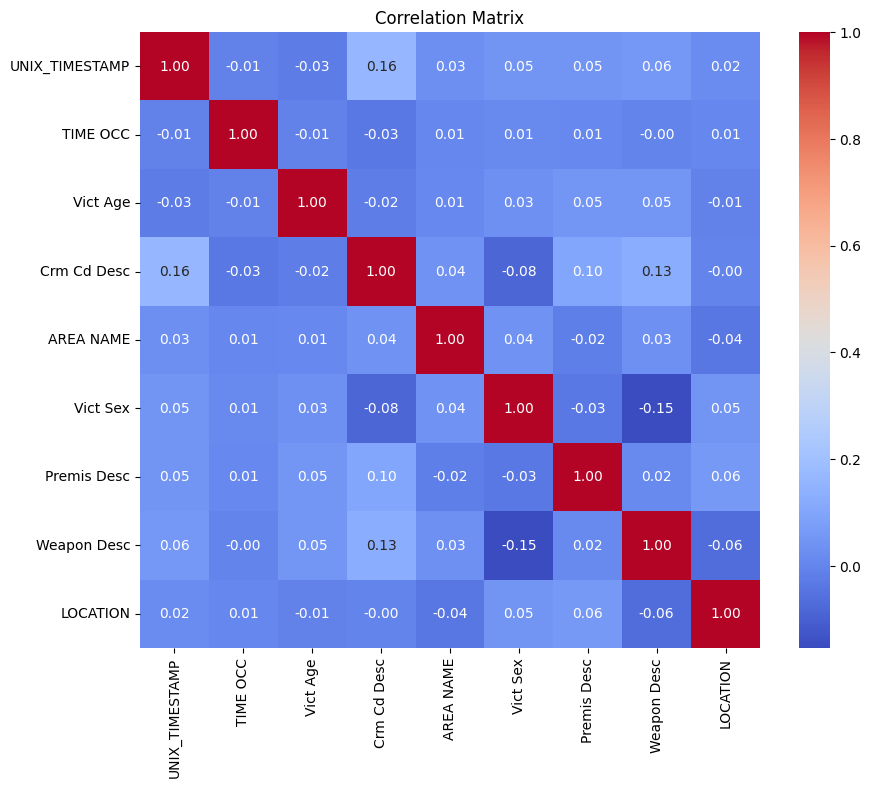

In [44]:
import matplotlib.pyplot as plt

# Assuming 'encoded' is your DataFrame with encoded data
# Compute the correlation matrix
correlation_matrix = encoded.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the encoded data
scaled_encoded = scaler.fit_transform(encoded)

# Check the scaled data
scaled_encoded

array([[-0.81282884,  0.25111669, -0.98297296, ..., -1.64743014,
         0.2459249 , -1.27977097],
       [ 0.05679015,  0.70983711,  1.32189575, ...,  0.45914324,
         0.2459249 , -0.48036343],
       [ 0.09955829,  0.11876457,  0.80970271, ..., -0.31257176,
         0.90233005, -0.71662018],
       ...,
       [ 4.34786089,  0.38647682, -1.30309361, ..., -2.06457338,
         0.2459249 ,  1.16177095],
       [ 4.9893831 , -0.74904422, -1.55919013, ..., -1.93943041,
        -1.72329057, -0.9918643 ],
       [ 4.30509275, -0.13992366, -1.43114187, ..., -2.06457338,
         0.2459249 , -0.41305192]], shape=(21684, 9))

# Data Describe

In [47]:
data.describe()

,DR_NO,DATE OCC,TIME OCC,Vict Age,LAT,LON
count,2.168400e+04,21684,21684.000000,21684.000000,21684.000000,21684.000000
mean,2.411630e+08,2024-03-18 00:23:38.483674880,1343.034265,37.353164,34.060767,-118.354681
min,2.303006e+08,2024-01-01 00:00:00,1.000000,2.000000,33.705900,-118.667300
25%,2.406043e+08,2024-01-31 00:00:00,900.000000,26.000000,33.983300,-118.417900
50%,2.412083e+08,2024-03-01 00:00:00,1430.000000,35.000000,34.046600,-118.321300
75%,2.416074e+08,2024-04-10 00:00:00,1900.000000,47.000000,34.167500,-118.279500
max,2.521041e+08,2025-03-12 00:00:00,2359.000000,99.000000,34.327400,-118.161100
std,8.974628e+05,NaN,664.908343,15.619471,0.119001,0.100071


In [48]:
encoded.describe()

,UNIX_TIMESTAMP,TIME OCC,Vict Age,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
count,2.168400e+04,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000
mean,1.710721e+09,1343.034265,37.353164,24.125807,9.656844,1.071896,165.986303,54.253459,5547.557416
std,6.060725e+06,664.908343,15.619471,23.993732,6.048237,1.021263,47.946267,15.234845,3001.041635
min,1.704067e+09,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.706659e+09,900.000000,26.000000,4.000000,4.000000,0.000000,151.000000,58.000000,3038.000000
50%,1.709251e+09,1430.000000,35.000000,13.000000,11.000000,2.000000,188.000000,58.000000,5755.000000
75%,1.712707e+09,1900.000000,47.000000,37.000000,15.000000,2.000000,199.000000,66.000000,8145.000000
max,1.741738e+09,2359.000000,99.000000,87.000000,20.000000,3.000000,227.000000,70.000000,10222.000000


# Regression

Mean Squared Error (MSE): 242.954007213748
R² Score: 0.010271807370752728


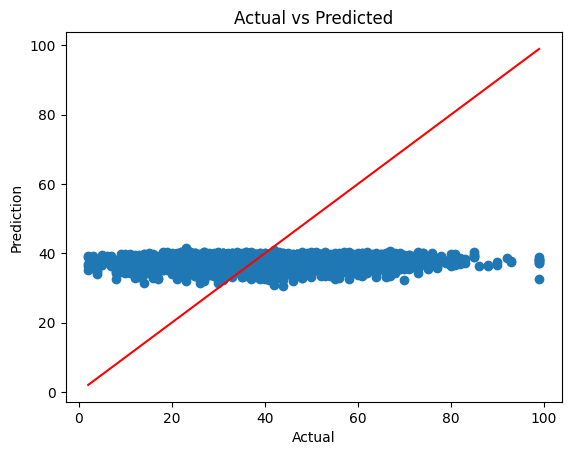

,UNIX_TIMESTAMP,TIME OCC,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
914790,1.705795e+09,1500,37,20,0,199,58,10093
893024,1.733530e+09,1220,4,2,2,151,58,9006
960021,1.708042e+09,2120,4,5,0,151,58,128
978676,1.706573e+09,1430,4,9,2,199,58,6191
881708,1.707696e+09,1130,2,4,2,199,24,5283
...,...,...,...,...,...,...,...,...
948807,1.704326e+09,2330,75,12,0,218,68,5311
1004559,1.709856e+09,1035,56,1,2,199,58,9310
909378,1.714435e+09,250,37,4,2,87,58,1254
882532,1.713312e+09,2206,75,12,2,218,68,4640


In [49]:
# Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


target = 'Vict Age'
X = encoded.copy()
# Features und Zielvariable definieren
X = X.drop(columns=[target])
y = encoded[target]

# Train- & Testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen und Evaluation
y_pred = model.predict(X_test)
# Calculate and print evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Actual vs Predicted")
plt.show()

X_train

In [50]:
# Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# filtered data -> 70 training/ 30 test split -> use encoded data -> use fit training function -> train based on gender -> Accuracy
# todo: confusion matrix

encoded_classifier = encoded.copy()
X = encoded_classifier.drop(columns=['Vict Sex'])  # Drop VicSex from features
y = encoded_classifier['Vict Sex']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


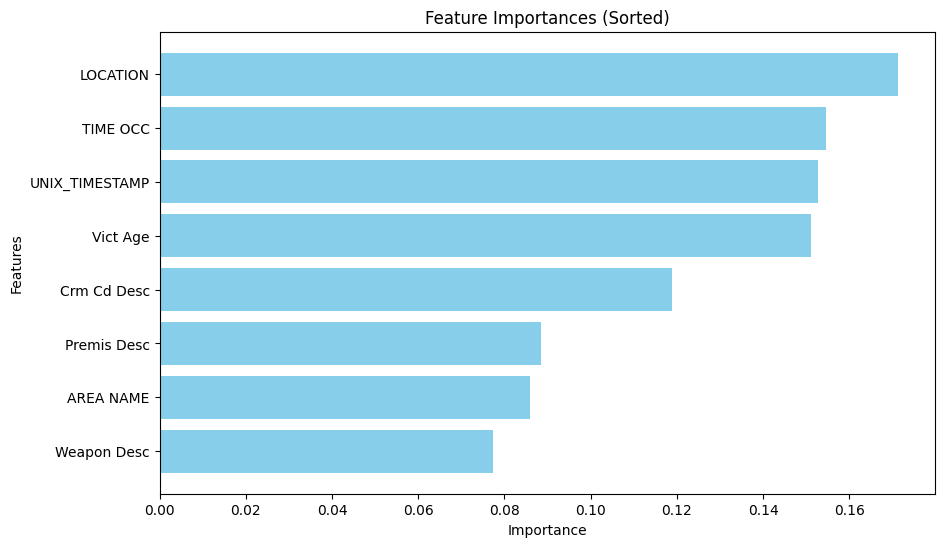

In [51]:
# Sort feature importances in ascending order
importances = clf.feature_importances_
features = X.columns  # Use the column names of X as feature names
sorted_indices = importances.argsort()

# Plotting the sorted feature importances
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], importances[sorted_indices], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Sorted)')
plt.show()


In [52]:
encoded.describe()

,UNIX_TIMESTAMP,TIME OCC,Vict Age,Crm Cd Desc,AREA NAME,Vict Sex,Premis Desc,Weapon Desc,LOCATION
count,2.168400e+04,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000
mean,1.710721e+09,1343.034265,37.353164,24.125807,9.656844,1.071896,165.986303,54.253459,5547.557416
std,6.060725e+06,664.908343,15.619471,23.993732,6.048237,1.021263,47.946267,15.234845,3001.041635
min,1.704067e+09,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.706659e+09,900.000000,26.000000,4.000000,4.000000,0.000000,151.000000,58.000000,3038.000000
50%,1.709251e+09,1430.000000,35.000000,13.000000,11.000000,2.000000,188.000000,58.000000,5755.000000
75%,1.712707e+09,1900.000000,47.000000,37.000000,15.000000,2.000000,199.000000,66.000000,8145.000000
max,1.741738e+09,2359.000000,99.000000,87.000000,20.000000,3.000000,227.000000,70.000000,10222.000000


In [53]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Export the decision tree to a DOT format
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=sex_encoder.classes_, filled=True, rounded=True)

# Render the DOT file to an SVG
graph = Source(dot_data, format="svg")
svg = graph.pipe().decode("utf-8")

# Save the SVG to a file
with open("decision_tree.svg", "w") as f:
    f.write(svg)


In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if necessary (e.g., 'DR_NO' is just an identifier)
#encoded = encoded.drop(columns=['Unnamed: 0', 'DR_NO'], errors='ignore')  

# Normalize data for better clustering (important for features with different scales)
scaler = StandardScaler()
encoded_scaled = scaler.fit_transform(encoded)

# Define the number of clusters
k = 3  # Adjust based on elbow method or domain knowledge

# Apply k-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
encoded["Cluster"] = kmeans.fit_predict(encoded_scaled)

# Check results
print(encoded["Cluster"].value_counts())

Cluster
2    9335
0    8605
1    3744
Name: count, dtype: int64


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: Radius, min_samples: Mindestanzahl von Punkten in einem Cluster
labels = dbscan.fit_predict(X_normalized)

# Ergebnisse visualisieren
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering (Normalized Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

for i, label in enumerate(labels):
    plt.text(X_normalized[i, 0], X_normalized[i, 1], sex_encoder.inverse_transform([label])[0], fontsize=8, color='black', alpha=0.6)
    
plt.show()


NameError: name 'X_normalized' is not defined